In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Using clustering to separate Black Schole and linear paths

In [5]:
def LeadLag(path,lagging =1):
    if lagging == 0:
        return path
    path = np.repeat(path, lagging+1)
    lead = np.copy(path)
    lead = lead[lagging:]
    lag = np.copy(path)
    lag = path[:-lagging]

    path = np.vstack((lead,lag)).T
    return(path)

In [12]:
def black_scholes_path(y0, mu, sigma, dt, num_steps):
    paths = [0]*num_steps
    paths[0] = y0

    for i in range(1, num_steps):
        z = np.random.standard_normal()
        paths[i] = paths[i - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

    return paths

Text(0.5, 0, 'Time step')

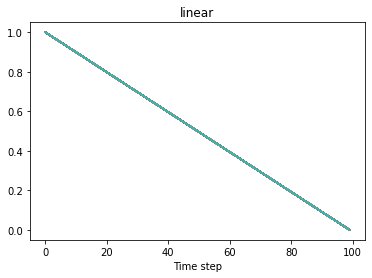

In [17]:
import random
import iisignature
model1 =[]

for i in range(0,100):
    # Parameters
    beta =  random.randint(1,20) * -1**random.randint(0,1)  # Slope
    alpha = random.randint(1,260) * -1**random.randint(0,1) 
    linear = list(range(0,100))
    linear= [x*beta +alpha for x in linear]
    min_val = min(linear)
    
    max_val = max(linear)
    linear = [(x - min_val) / (max_val - min_val) for x in linear]
    plt.plot(linear)
    path= LeadLag(linear,lagging =1)
    signature = iisignature.sig(path ,3)
    signature[2:6]=signature[2:6]*2
    signature[6:]=signature[6:]*6
    signature = signature[2:]
    model1.append(signature)
    
plt.title('linear')
plt.xlabel('Time step')


Text(0.5, 0, 'Time step')

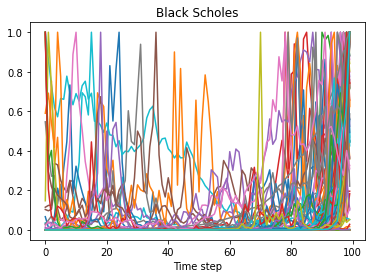

In [18]:
model2 =[]

for i in range(0,100):
    # Parameters
    S0 =  random.random()*255   # Initial stock price
    mu = random.random() 
    sigma = random.random() #  volatility
    dt = 1  # Time to expiration in years
    num_steps = 100  # Number of time steps (daily)


    black_schole = black_scholes_path(S0, mu, sigma, dt, num_steps)

    
    min_val = min(black_schole)
    max_val = max(black_schole)
    black_schole = [(x - min_val) / (max_val - min_val) for x in black_schole]
    plt.plot(black_schole)
    path= LeadLag(black_schole,lagging =1)
    signature = iisignature.sig(path ,3)
    signature[2:6] = signature[2:6]*2
    signature[6:]=signature[6:]*6
    signature = signature[2:]
    model2.append(signature)
plt.title('Black Scholes')
plt.xlabel('Time step')

In [20]:
# Perform k-means clustering
from sklearn.cluster import KMeans
data=np.append(model1, model2,axis=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

# Modelling Animal Trajectory

We will asumme that our animal has two behaviours A and B that result in different movement behaviours. We have access to the trajectory over time.

# Simulate trajectories

We will assume that either the animals moves linearly or according to black schole during a time period p. After each time period p the animal either stays in the same behaviour model or switches to the other model with some constant probability

In [64]:
def generatePath(y0,n,black_schole):
    dt = 0.01  
    if black_schole:
        mu = random.random()  
        sigma = random.random() 

        black_schole = black_scholes_path(y0, mu, sigma, dt, n)
        return black_schole
    else:
        beta =  random.randint(1,20) * -1**random.randint(0,1)  # Slope
        linear = list(range(0,n))
        linear=[y*dt for y in linear]
        linear= [y*beta +y0 for y in linear]
        return linear

In [65]:
def generateData(
   number_of_paths=500,
   period=100,
   numberOfperiod=20,
   startingProb=0.5,
   transitionProb=0.3):
   paths=[]

   labels=[]
   for i in range(number_of_paths):
      starting = random.random()
      if starting>startingProb:
         black_schole=1
      else:
         black_schole=0
      path=[]
      label=[]
      y0=random.random()*255    
      for t in range(numberOfperiod):
         label= label + [black_schole]*period  
         path = path+ generatePath(y0,period,black_schole)
         
         transition = random.random()
         
         if transition<transitionProb:
            black_schole = 1-black_schole
         y0=path[-1]
      
      labels.append(label)
      paths.append(path)
   paths=np.array(paths)
   labels=np.array(labels)
   return paths,labels
   

In [75]:
def fitKmeans(paths, periods, n_states,signatureLevel):
    Signatures=[]
    for i in range(paths.shape[0]):
        path=paths[i,]

        parts = [path[i:min(len(path),i+periods)] for i in range(0, len(path), periods)]
        
        for path in parts:
            
            min_val = min(path)
            max_val = max(path)
            path = [(x - min_val) / (max_val - min_val) for x in path]
            path = LeadLag(path,lagging=1)
            sig=iisignature.sig(path,signatureLevel)
            Signatures.append(sig)

    Signatures = np.array(Signatures)
    print(Signatures.shape)
    kmeans = KMeans(n_clusters=n_states)
    kmeans.fit(Signatures)
    
    return kmeans

In [79]:
from sklearn.cluster import KMeans
from hmmlearn import hmm


def HMMwithSignatures(paths,estimatedPeriod,n_states,signatureLevel):
    
    
    kmeans = fitKmeans(paths, estimatedPeriod, n_states,signatureLevel)
    
    discretizedPath =[]
    for i in range(paths.shape[0]):
        path=paths[i,]
    
        parts = [path[i:min(len(path),i+estimatedPeriod)] for i in range(0, len(path), estimatedPeriod)]
        alteredpath=[]
        for path in parts:
            
            min_val = min(path)
            max_val = max(path)
            path = [(x - min_val) / (max_val - min_val) for x in path]
            path = LeadLag(path,lagging=1)
            sig=iisignature.sig(path,signatureLevel)
            sig = np.array([sig])
            alteredpath.append(kmeans.predict(sig)[0])
        alteredpath= np.array(alteredpath)
        discretizedPath.append(alteredpath)
        
    discretizedPath=np.array(discretizedPath)
    print(discretizedPath.shape)
    model = hmm.CategoricalHMM(n_components=n_states, n_iter=100)
    model.fit(discretizedPath)


    print("Transition matrix:")
    print(model.transmat_)

    print("\nEmission probabilities:")
    print(model.emissionprob_)

    
    return model,kmeans
    
    


In [66]:
paths, labels=generateData(number_of_paths=500,period=100,numberOfperiod=20)

In [ ]:
for i in range(4):
    t=random.randint(0,499)
    plt.plot(paths[t])
    plt.ylabel('y')
    plt.xlabel('Time')
    plt.show()

In [77]:
from sklearn.metrics import accuracy_score
periodEstimate  = [2,5,10,100,200]


def Train(period,SignatureLevel=3):
    accuracies = []
    for times in range(0,10):      
        HMMmodel,clustering=HMMwithSignatures(paths[:400],period,2,SignatureLevel)
        index=400
        for path in paths[400:]:
            parts = [path[i:min(len(path),i+period)] for i in range(0, len(path), period)]
            alteredpath=[]
            for part in parts:
                
                min_val = min(part)
                max_val = max(part)
                part = [(x - min_val) / (max_val - min_val) for x in part]
                part = LeadLag(part,lagging=1)
                sig=iisignature.sig(part,SignatureLevel)
                sig = np.array([sig])
                
                alteredpath.append(clustering.predict(sig)[0])
                
            alteredpath= np.array(alteredpath)
            t=HMMmodel.predict(alteredpath.reshape(-1,1))
            
            estimate=[]
            length=100*20
            for i in t:
                temp= [i]*min(period,length)
                estimate = estimate + temp
                length= length-period
            
            results= accuracy_score(estimate,labels[index])
            accuracies.append(max(results,1-results))
            index=index+1   
    return accuracies
    